In [49]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [2]:
FILE_NAME = "train"
df = pd.read_csv("{}.csv".format(FILE_NAME))

/home/v_stepanov/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,region,company_type,company_name,inn,incorporation_year,okved_osn_code,init_equities,init_equity_types,purpose,other_reasons_for_check,check_date,type,kpp,type_nasel_punkt,name_nasel_punkt,index,risk_category
0,adygea,юридическое лицо,муниципальное бюджетное дошкольное образовател...,105034720,1996.0,88.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-07-15,выездная,10501001.0,город,майкоп,385000.0,5
1,adygea,юридическое лицо,государственное казенное учреждение здравоохра...,105018083,1999.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-11-15,выездная,10501001.0,город,майкоп,385017.0,5
2,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105020893,1995.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385018.0,5
3,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105016209,1996.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385000.0,5
4,adygea,юридическое лицо,государственное бюджетное учреждение республик...,105035498,2001.0,88.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385000.0,5
5,adygea,юридическое лицо,"открытое акционерное общество ""зарем""",105000819,1992.0,28.0,6.479800e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-06-15,выездная,10501001.0,город,майкоп,385001.0,3
6,adygea,юридическое лицо,"общество с ограниченной ответственностью ""югор...",2303023723,2005.0,8.0,1.000000e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385000.0,4
7,adygea,юридическое лицо,федеральное государственное бюджетное образова...,105014177,1994.0,85.0,NaN,NaN,проверка соблюдения трудового законодательства...,NaN,2018-12-15,выездная,10501001.0,город,майкоп,385000.0,4
8,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105020251,1997.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385006.0,4
9,adygea,юридическое лицо,"общество с ограниченной ответственностью ""мпк""...",107011090,2006.0,11.0,1.000000e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385000.0,5


In [42]:
def transform_med(row): # ~100
    if str(row.purpose) != 'nan' and ('государственный контроль за обращением медицинских изделий' in row.purpose or 'контроль качества и безопасности медицинской деятельности' in row.purpose or 'фарма' in row.purpose or 'лекар' in row.purpose):
        row.purpose = 'государственный контроль за обращением медицинских изделий'
    return row

def transform_san_epidem(row): # 94
    if str(row.purpose) == 'nan':
        return row
    if 'санитарно-эпидемиологический надзор' in row.purpose:
        row.purpose = 'санитарно-эпидемиологический надзор'
    elif 'санитарн' in row.purpose and 'эпидемиологическ' in row.purpose and 'благополуч' in row.purpose:
        if 'медицин' in row.purpose or 'помощ' in row.purpose:
            row.purpose = 'санитарно-эпидемиологического благополучия медицина'
        elif 'школ' in row.purpose or 'образова' in row.purpose:
            row.purpose = 'санитарно-эпидемиологического благополучия образование'
        elif 'лагер' in row.purpose:
            row.purpose = 'санитарно-эпидемиологического благополучия лагерь'
        else:
            row.purpose = 'санитарно-эпидемиологического благополучия'
    return row

def transform_fire(row): #103
    if str(row.purpose) == 'nan':
        return row
    if 'пожар' in row.purpose:
        row.purpose = 'пожар'
    return row

def transform_eco(row): #31
    if str(row.purpose) == 'nan':
        return row
    if 'экол' in row.purpose:
        row.purpose = 'экология'
    return row

def transform_land(row): #32
    if str(row.purpose) == 'nan':
        return row
    if 'земельн' in row.purpose:
        row.purpose = 'земля'
    return row

def transform_veterinar(row): #95
    if str(row.purpose) == 'nan':
        return row
    if 'зерн' in row.purpose or 'ветерин' in row.purpose:
        row.purpose = 'ветеринар'
    return row

def transform_children(row): #24
    if str(row.purpose) == 'nan':
        return row
    if 'детей' in row.purpose:
        row.purpose = 'дети'
    return row

def transform_env(row): #12
    if str(row.purpose) == 'nan':
        return row
    if 'окруж' in row.purpose:
        row.purpose = 'окружающая среда'
    return row

def transform_defence(row): #55
    if str(row.purpose) == 'nan':
        return row
    if 'обор' in row.purpose:
        row.purpose = 'оборона'
    return row    

def transform_ul_ip(row): #23
    if str(row.purpose) == 'nan':
        return row
    if 'юл' in row.purpose and 'ип' in row.purpose:
        row.purpose = 'юл ип'
    return row    

def transform_defene_people(row): #33
    if str(row.purpose) == 'nan':
        return row
    if 'защи' in row.purpose and 'насел' in row.purpose:
        row.purpose = 'защита населения'
    return row
    
    
def transorm_pdd(row): #17
    if str(row.purpose) == 'nan':
        return row
    if 'доро' in row.purpose:
        row.purpose = 'пдд'
    return row

def transorm_autp(row): #9
    if str(row.purpose) == 'nan':
        return row
    if 'авто' in row.purpose or 'пассаж' in row.purpose:
        row.purpose = 'авто транспорт'
    return row
    
def transorm_housing(row): #9
    if str(row.purpose) == 'nan':
        return row
    if 'жилищ' in row.purpose:
        row.purpose = ' жилищный надзор'
    return row
    
def transform_plants(row): #14
    if str(row.purpose) == 'nan':
        return row
    if 'семен' in row.purpose or 'раст' in row.purpose:
        row.purpose = 'растения'
    return row
    
def transform_customer_rights(row): #9
    if str(row.purpose) == 'nan':
        return row
    if 'прав' in row.purpose or 'потреб' in row.purpose:
        row.purpose = 'права потребителей'
    return row
        
def transform_nedra(row): 
    if str(row.purpose) == 'nan':
        return row
    if 'недр' in row.purpose:
        row.purpose = 'недра'
    return row

def transform_connection(row): 
    if str(row.purpose) == 'nan':
        return row
    if 'связ' in row.purpose:
        row.purpose = 'связь'
    return row
    
def transform_soc(row): 
    if str(row.purpose) == 'nan':
        return row
    if 'соц' in row.purpose:
        row.purpose = 'социальный'
    return row

def transform_sanit(row): 
    if str(row.purpose) == 'nan':
        return row
    if 'санит' in row.purpose:
        row.purpose = 'санитарный'
    return row

def transform_license(row): 
    if str(row.purpose) == 'nan':
        return row
    if 'лицен' in row.purpose:
        row.purpose = 'лицензирование'
    return row


def transform_all(row): #to do in one pass
    methods = [
        transform_med,
        transform_san_epidem,
        transform_fire,
        transform_eco,
        transform_land,
        transform_veterinar,
        transform_children,
        transform_env,
        transform_defence,
        transform_ul_ip,
        transform_defene_people,
        transorm_pdd,
        transorm_autp,
        transorm_housing,
        transform_plants,
        transform_customer_rights,
        transform_nedra,
        transform_connection,
        transform_soc,
        transform_sanit,
        transform_license
        
    ]
    for method in methods:
        row = method(row)
    return row

%time df = df.apply(transform_all, axis=1)


CPU times: user 1min 23s, sys: 252 ms, total: 1min 24s
Wall time: 1min 24s


In [40]:
#df.purpose.unique(), len(df.purpose.unique())


(array(['проверка соблюдения трудового законодательства',
        'права потребителей',
        'государственный контроль надзор за соблюдением обязательных требований к розничной продаже алкогольной продукции и розничной продаже алкогольной продукции при оказании услуг общественного питания.',
        'пожар', 'оборона', 'окружающая среда', 'санитарный',
        'соблюдение требований федерального закона от 26.07.2006 № 135-фз "о защите конкуренции"',
        'лицензионный контроль за соблюдением лицензионных требований, установленных ст. 193 жк рф',
        ' жилищный надзор', 'земля',
        'государственный контроль за обращением медицинских изделий',
        'ветеринар',
        'контроль за соблюдением антимонопольного законодательства, контроль за соблюдением фз "о защите конкуренции"',
        'выполнение обязательных требований чс федеральный закон от 21.12.1994 г. 68-фз выполнение обязательных требований го, федеральный закон от 12.02.1998 г. 28-фз',
        'лицензионный ко

In [41]:
cnt = 0
for p in df.purpose.unique():
    if str(p) != 'nan' and ('лицен' in p):
        print(p)
        print()
        cnt += 1
#     if str(p) != 'nan' and 'государственный контроль за обращением медицинских изделий' in p:
#         if 'государственный надзор в сфере обращения лекарственных средств' not in p:
#             print(p)
#         cnt += 1
print(cnt)

лицензионный контроль за соблюдением лицензионных требований, установленных ст. 193 жк рф

лицензионный контроль осуществления медицинской деятельности

лицензионный контроль медицинской деятельности

соблюдение лицензионных требований.

обеспечение лицензионного контроля на основании фз №99-фз от 04.05.11 ст.19 п.9.2

соблюдение лицензионных требований

соблюдение юл лицензионных требований и условий

осуществление лицензионного контроля выполнения лицензиатом лицензионных требований

соблюдение выполнения условия соглашения лицензионного соглашения эли 00327 вэ

лицензионный контроль

контроль соблюдения лицензионных требований и условий

контроль и надзор в области обеспечения радиационной безопасности. фз от 09.01.1996 № 3-фз "о радиационной безопасности населения", фз от 04.05.2011 № 99-фз "о лицензировании отдельных видов деятельности"

фз от 04.05.2011 № 99-фз "о лицензировании отдельных видов деятельности"

лицензионный контроль в соответствии с 99-фз от 04.05.2011

федеральный

In [7]:
df.to_csv("{}.csv".format(FILE_NAME), index=False)

In [8]:
df

,region,company_type,company_name,inn,incorporation_year,okved_osn_code,init_equities,init_equity_types,purpose,other_reasons_for_check,check_date,type,kpp,type_nasel_punkt,name_nasel_punkt,index,risk_category
0,adygea,юридическое лицо,муниципальное бюджетное дошкольное образовател...,105034720,1996.0,88.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-07-15,выездная,10501001.0,город,майкоп,385000.0,5
1,adygea,юридическое лицо,государственное казенное учреждение здравоохра...,105018083,1999.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-11-15,выездная,10501001.0,город,майкоп,385017.0,5
2,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105020893,1995.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385018.0,5
3,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105016209,1996.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385000.0,5
4,adygea,юридическое лицо,государственное бюджетное учреждение республик...,105035498,2001.0,88.0,NaN,NaN,проверка соблюдения трудового законодательства,NaN,2018-02-15,выездная,10501001.0,город,майкоп,385000.0,5
5,adygea,юридическое лицо,"открытое акционерное общество ""зарем""",105000819,1992.0,28.0,6.479800e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-06-15,выездная,10501001.0,город,майкоп,385001.0,3
6,adygea,юридическое лицо,"общество с ограниченной ответственностью ""югор...",2303023723,2005.0,8.0,1.000000e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385000.0,4
7,adygea,юридическое лицо,федеральное государственное бюджетное образова...,105014177,1994.0,85.0,NaN,NaN,проверка соблюдения трудового законодательства...,NaN,2018-12-15,выездная,10501001.0,город,майкоп,385000.0,4
8,adygea,юридическое лицо,государственное бюджетное учреждение здравоохр...,105020251,1997.0,86.0,NaN,NaN,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385006.0,4
9,adygea,юридическое лицо,"общество с ограниченной ответственностью ""мпк""...",107011090,2006.0,11.0,1.000000e+04,уставный капитал,проверка соблюдения трудового законодательства...,NaN,2018-03-15,выездная,10501001.0,город,майкоп,385000.0,5


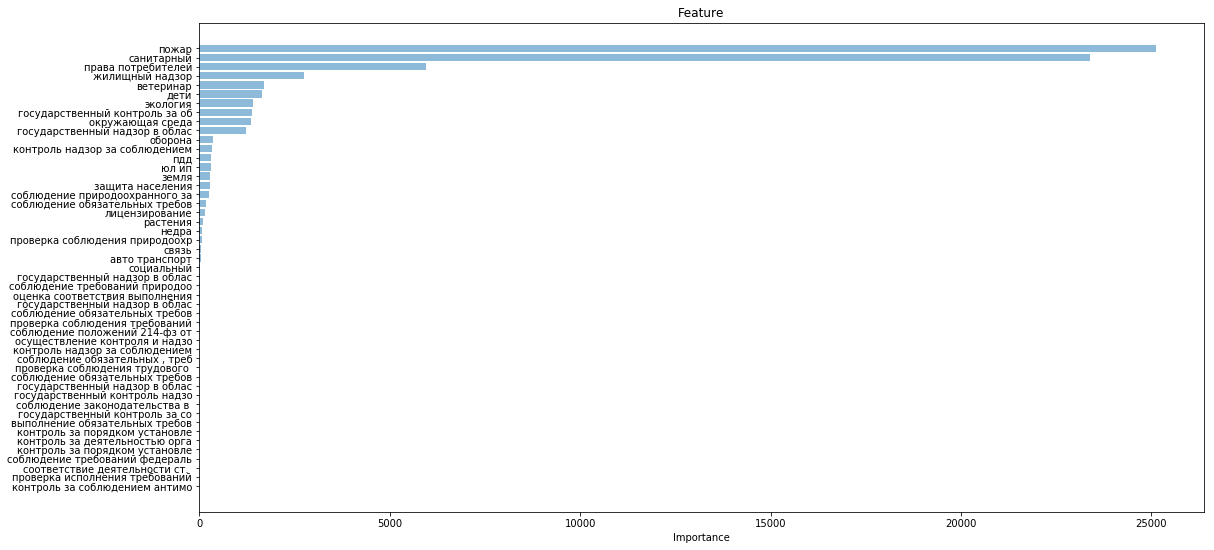

In [54]:
plt.rcParams['figure.figsize'] = (18, 9)

def draw_importance(columns, importances):
    order = np.argsort(importances)
    objects = columns[order]
    y_pos = np.arange(len(objects))
    performance = np.array(importances)[order]

    objects = [c if len(c) < 30 else c[:30] for c in objects]
    
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel('Importance')
    plt.title('Feature')

    plt.show()
# df[df.purpose.notnull()].purpose.unique()
draw_importance(*np.unique(df[df.purpose.notnull()].purpose, return_counts=True))
